
<center>

# Tasks

</center>

<br/>

<center>

Machine Learning and Statistics

ATU 

Winter 2023/24

Lecturer: Ian McLoughlin

Author: Jamie Tohall

</center>

<br/>

***

<br/>

**<h3 style="text-align: center;">Task 1</h3>**

<br/>


> Square roots are difficult to calculate. In Python, you typically use the power operator (a double asterisk) or a package such as 'math'. In this task, you should write a function 'sqrt(x)' to approximate the square root of a floating point number 'x' without using the power operator or a package.
>
> Rather, you should use Newton’s method. Start with an initial guess for the square root called $z_0$. You then repeatedly improve it using the following formula, until the difference between some previous guess $z_i$ and the next $zi+1$ is less than some threshold, say 0.01.

$$ z_{i+1} = z_i − \frac{z_i × z_i − x}{2z_i} $$

In [252]:
# Defining the function
def sqrt(x):
    # Inital guess for the square root
    z = x / 4.0

    # Create a loop for accurancy, also increased range from 100 to 1000 for more accurate output
    for i in range(1000):
        # Newtowns method for a better approximation
        z = z - (((z * z) - x) / (2 * z))

    # z should be a better approximation for the square root
    return z

In [253]:
# Testing the outcome of the function

sqrt(11)

3.3166247903554

In [254]:
# Using Python to compare results

11**0.5

3.3166247903554

***

<br/>

**<h3 style="text-align: center;">Task 2</h3>**

<br/>


> Consider the below contingency table based on a survey asking respondents whether they prefer coffee or tea and whether they prefer plain or chocolate biscuits. Use 'scipy.stats' to perform a chi-squared test to see whether there is any evidence of an association between drink preference and biscuit preference in this instance.

<br/>


<center>

|         |         | Biscuit   |       |
|---------|---------|-----------|-------|
|         |         |Chocolate  |Plain  |
|**Drink**| Coffee  |   43      |  57   |
|         |  Tea    |   56      |  45   |

<center/>


<br/>

**Importing Modules**

In [255]:
# Data frames.
import pandas as pd

# Shuffles.
import random

import numpy as np

# Statistics.
import scipy.stats as ss

from scipy.stats import chi2_contingency

from scipy.stats.contingency import crosstab



<br/>

**Raw Data**


In [256]:
# 43 people in total preferred the coffee and chocolate biscuit combination

coffee_chocolate = [['Coffee', 'Chocolate']] * 43

# Output
coffee_chocolate

[['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 

In [257]:
# 56 people preferred tea and chocolate biscuit

tea_chocolate = [['Tea', 'Chocolate']] * 56

# Output
tea_chocolate

[['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'C

In [258]:
# 57 people preferred Coffee with a plain biscuit

coffee_plain = [['Coffee', 'Plain']] * 57

# Output
coffee_plain

[['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee'

In [259]:
# 45 people preferred tea with a plain biscuit

tea_plain = [['Tea', 'Plain']] * 45

# Output
tea_plain

[['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Plain']]

<br/>

**Merging raw data**

In [260]:
raw_data = coffee_chocolate + tea_chocolate + coffee_plain + tea_plain

raw_data

[['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 

In [261]:
# Shuffle the data.
random.shuffle(raw_data)

# Show.
raw_data

[['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Plain'],
 ['Coffee', 'Plain'],
 ['Tea', 'Plain'],
 ['Tea', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Tea', 'Chocolate'],
 ['Coffee', 'Plain'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Plain'],
 ['Coffee', 'Plain'],
 ['Tea', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Plain'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Tea', 'Plain'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Coffee', 'Chocolate'],
 ['Tea', 'Plain'],
 ['Coffee', 'Chocolate'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Tea', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Plain'],
 ['Coffee', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'],
 ['Tea', 'Chocolate'

In [262]:
# Zip the list - make the rows columns and the columns rows.
# Interchanges the outer and inner lists.
Beverage, Biscuit = list(zip(*raw_data))

# Show.
Beverage, Biscuit

(('Coffee',
  'Coffee',
  'Coffee',
  'Tea',
  'Tea',
  'Tea',
  'Coffee',
  'Tea',
  'Tea',
  'Coffee',
  'Tea',
  'Tea',
  'Coffee',
  'Coffee',
  'Tea',
  'Coffee',
  'Tea',
  'Tea',
  'Tea',
  'Coffee',
  'Tea',
  'Coffee',
  'Coffee',
  'Coffee',
  'Tea',
  'Tea',
  'Coffee',
  'Coffee',
  'Tea',
  'Tea',
  'Tea',
  'Coffee',
  'Tea',
  'Coffee',
  'Coffee',
  'Coffee',
  'Tea',
  'Coffee',
  'Coffee',
  'Coffee',
  'Tea',
  'Tea',
  'Tea',
  'Tea',
  'Coffee',
  'Coffee',
  'Coffee',
  'Tea',
  'Coffee',
  'Tea',
  'Tea',
  'Tea',
  'Tea',
  'Tea',
  'Coffee',
  'Coffee',
  'Tea',
  'Tea',
  'Tea',
  'Tea',
  'Tea',
  'Coffee',
  'Coffee',
  'Coffee',
  'Tea',
  'Tea',
  'Coffee',
  'Tea',
  'Coffee',
  'Tea',
  'Tea',
  'Tea',
  'Coffee',
  'Coffee',
  'Coffee',
  'Tea',
  'Tea',
  'Tea',
  'Coffee',
  'Tea',
  'Coffee',
  'Coffee',
  'Tea',
  'Tea',
  'Tea',
  'Tea',
  'Tea',
  'Coffee',
  'Tea',
  'Tea',
  'Tea',
  'Coffee',
  'Coffee',
  'Coffee',
  'Coffee',
  'Tea',
  'Coff

In [263]:
# Create a data frame with two lists, 'beverage' and 'biscuit'.
df = pd.DataFrame({'Beverage': Beverage, 'Biscuit': Biscuit})

# Show
df

,Beverage,Biscuit
0,Coffee,Chocolate
1,Coffee,Chocolate
2,Coffee,Chocolate
3,Tea,Chocolate
4,Tea,Chocolate
...,...,...
196,Tea,Plain
197,Tea,Chocolate
198,Tea,Chocolate
199,Coffee,Plain


<br/>

**Contingency Table**

In [264]:
# Perform Crosstabs Contingency Table
Table = pd.crosstab(index=df['Beverage'], columns=df['Biscuit'], margins=True)

# Show 
Table

Biscuit,Chocolate,Plain,All
Beverage,,,
Coffee,43,57,100
Tea,56,45,101
All,99,102,201


In [265]:
chisquare = ss.chi2_contingency(Table, correction=False)

chisquare

(3.113937364324669,
 0.5389425856850661,
 4,
 array([[ 49.25373134,  50.74626866, 100.        ],
        [ 49.74626866,  51.25373134, 101.        ],
        [ 99.        , 102.        , 201.        ]]))

In [266]:
# Perform Crosstabs Contingency.
cross = ss.contingency.crosstab(df['Beverage'], df['Biscuit'])

# Show.
cross

((array(['Coffee', 'Tea'], dtype=object),
  array(['Chocolate', 'Plain'], dtype=object)),
 array([[43, 57],
        [56, 45]]))

In [267]:
# The first variable values, and the second.
first, second = cross

# Show.
first, second

((array(['Coffee', 'Tea'], dtype=object),
  array(['Chocolate', 'Plain'], dtype=object)),
 array([[43, 57],
        [56, 45]]))


<br/>

**Statistical Test**

In [268]:

data = pd.DataFrame({'Biscuit': ['Chocolate', 'Plain'],
                     'Coffee': [43, 57],
                     'Tea': [56, 45]})


data.set_index('Biscuit', inplace=True)

data

,Coffee,Tea
Biscuit,,
Chocolate,43,56
Plain,57,45


In [269]:
results = ss.chi2_contingency(data)

#print("Chi-squared value:", chi2)
#print("P-value:", p)

#Show 
results

(2.6359100836554257,
 0.10447218120907394,
 1,
 array([[49.25373134, 49.74626866],
        [50.74626866, 51.25373134]]))

<br/>

**Results**
<br/>

P-value: 0.10447218120907394 <br/>
Chi-Squared Statistic: 2.6359100836554257
<br/>

When the P-value is less than 0.05, the probability of observing the obtained results, or more extreme ones, under the assumption that the null hypothesis is true, is less than 5%. This threshold is widely used as a benchmark for statistical significance, implying that the observed effect or relationship between the studied variables is unlikely to have occurred by chance alone. 
<br/>

In such cases, researchers typically reject the null hypothesis in favor of the alternative hypothesis, suggesting a statistically significant effect or relationship exists. However, it is essential to consider the context, effect size, and potential biases when interpreting results with a p-value less than 0.05 (StatisticsEasily).
<br/>

With a P-value of 0.1, I can conclude that there is no correlation between drink preference and biscuit preference. The result is deemed significant, therefore, we can reject the null hypothesis and conclude that there is sufficient evidence to say that the alternative hypothesis is true. 

<br/>

***

<br/>

**<h3 style="text-align: center;">Task 3</h3>**

<br/>

> Perform a t-test on the famous penguins data set to investigate whether there is evidence of a significant difference in the body mass of male and female gentoo penguins.

<br/>

**What is a T-Test?**

A T-Test is a statistical test that is used to compare the means of two groups. It is often used in hypothesis testing to determine whether a process or treatment actually has an effect on the population of interest, or whether two groups are different from one another.
<br/>


The T-Test is a parametric test of difference, meaning that it makes the same assumptions about your data as other parametric tests. The T-Test assumes your data:

1. Is independent
2. Is (approximately) normally distributed
3. Has a similar amount of variance within each group being compared (a.k.a. homogeneity of variance)

<br/>


When choosing a T-Test, you will need to consider two things: whether the groups being compared come from a single population or two different populations, and whether you want to test the difference in a specific direction.

<br/>

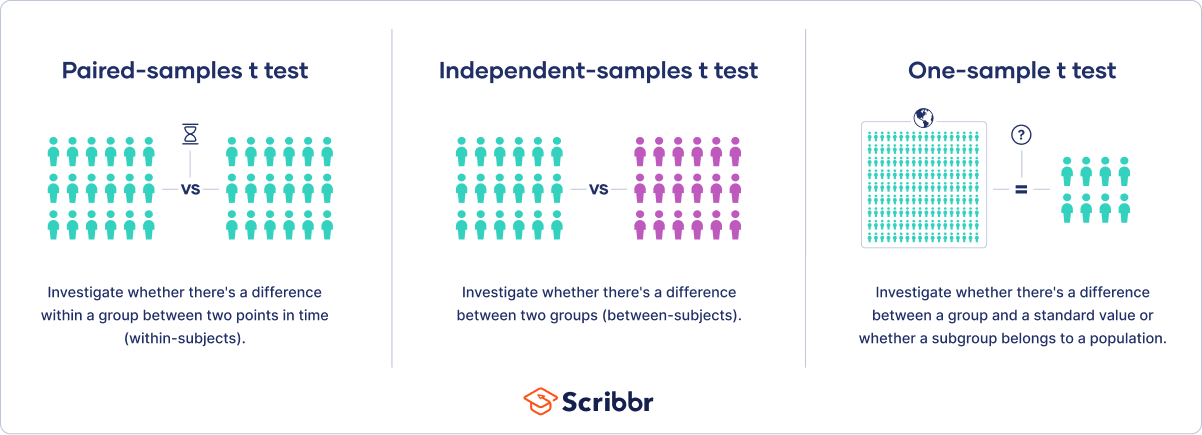

<br/>

The formula for the two-sample T-Test (a.k.a. the Student’s T-Test):

<br/>

<center>

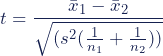

</center>

<br/>

Using the two sample T-test, t is the t value, x1 and x2 are the means of the two groups being compared, s2 is the pooled standard error of the two groups, and n1 and n2 are the number of observations in each of the groups.

A larger t value shows that the difference between group means is greater than the pooled standard error, indicating a more significant difference between the groups.

You can compare your calculated t value against the values in a critical value chart (e.g., Student’s t table) to determine whether your t value is greater than what would be expected by chance. If so, you can reject the null hypothesis and conclude that the two groups are in fact different. (Scribber.com)

<br/>

**Penguins Dataset**

<br/>

<center>

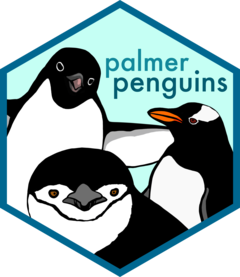

</center>

<br/>

The Palmer Penguins Dataset contains size measurements for 344 penguins which were observed on three islands in the Palmer Archipelago, Antarctica. The Data records the species of penguin, bill length, bill depth, flipper length, body mass, sex, and Island.
<br/>

These data were collected from 2007 - 2009 by Dr. Kristen Gorman with the Palmer Station Long Term Ecological Research Program, part of the US Long Term Ecological Research Network. The data were originally imported from the Environmental Data Initiative (EDI) Data Portal, and are available for use by CC0 license in accordance with the Palmer Station Data Policy.

<br/>




**Importing Libraries**

In [270]:
# Plots
import matplotlib.pyplot as plt

# Numerical arrays
import numpy as np

# Data frames
import pandas as pd

# Statistics
import scipy.stats as ss

<br/>

**Reading in the Dataset**

In [271]:

#Load penguin dataset
df = pd.read_csv('C:/Users/Jamie/Desktop/MLS/Machine_Learning_and_Statistics/CSV files/penguins.csv')

#Show 
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


<br/>

**Analysing the dataset**

In [272]:
# Viewing columns
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [273]:
# Description of data
df.describe

<bound method NDFrame.describe of     species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    MALE  

In [274]:
# Cleaning the data
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

<br/>

**Pulling data on Gentoo Species**

In [275]:
# Only require information on gentoo penguins
gentoo_df = df[df['species'] == 'Gentoo']

gentoo_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
220,Gentoo,Biscoe,46.1,13.2,211.0,4500.0,FEMALE
221,Gentoo,Biscoe,50.0,16.3,230.0,5700.0,MALE
222,Gentoo,Biscoe,48.7,14.1,210.0,4450.0,FEMALE
223,Gentoo,Biscoe,50.0,15.2,218.0,5700.0,MALE
224,Gentoo,Biscoe,47.6,14.5,215.0,5400.0,MALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


<br/>

**Body mass of Male and Female Gentoo penguins**

In [276]:
# The body mass of males
sample_a = gentoo_df[gentoo_df['sex'] == 'MALE']['body_mass_g'].to_numpy()

sample_a

array([5700., 5700., 5400., 5200., 5150., 5550., 5850., 5850., 6300.,
       5350., 5700., 5050., 5100., 5650., 5550., 5250., 6050., 5400.,
       5250., 5350., 5700., 4750., 5550., 5400., 5300., 5300., 5000.,
       5050., 5000., 5550., 5300., 5650., 5700., 5800., 5550., 5000.,
       5100., 5800., 6000., 5950., 5450., 5350., 5600., 5300., 5550.,
       5400., 5650., 5200., 4925., 5250., 5600., 5500., 5500., 5500.,
       5500., 5950., 5500., 5850., 6000., 5750., 5400.])

In [277]:
# The body mass of females
sample_b = gentoo_df[gentoo_df['sex'] == 'FEMALE']['body_mass_g'].to_numpy()

sample_b

array([4500., 4450., 4550., 4800., 4400., 4650., 4650., 4200., 4150.,
       4800., 5000., 4400., 5000., 4600., 4700., 5050., 5150., 4950.,
       4350., 3950., 4300., 4900., 4200., 5100., 4850., 4400., 4900.,
       4300., 4450., 4200., 4400., 4700., 4700., 4750., 5200., 4700.,
       4600., 4750., 4625., 4725., 4750., 4600., 4875., 4950., 4750.,
       4850., 4875., 4625., 4850., 4975., 4700., 4575., 5000., 4650.,
       4375., 4925., 4850., 5200.])

<br/>

**Perform T-Test**

In [278]:
# t-test
ss.ttest_ind(sample_a, sample_b)

Ttest_indResult(statistic=14.721676481405709, pvalue=2.133687602018886e-28)

<br/>

**Results**

P-Value: 2.133687602018886e-28 <br/>
T Statistic: 14.721676481405709
<br/>

From the above results we can conclude that there is evidence of a significant difference in the bodymass between male and female Gentoo penguins. 

<br/>


***

<br/>

**<h3 style="text-align: center;">Task 4</h3>**

<br/>

> Using the famous iris data set, suggest whether the setosa class is easily separable from the other two classes. Provide evidence for your answer.


<br/>

<center>

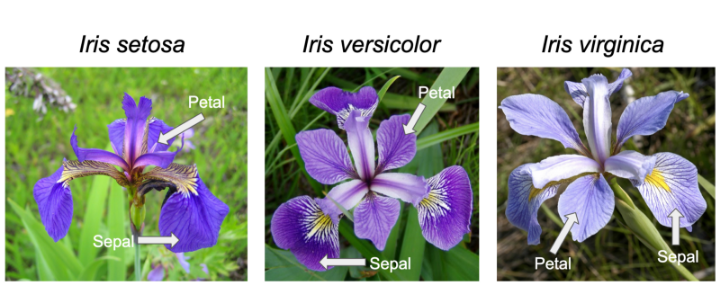

</center>

<br/>

The Iris Data Set is a multivariate data set used and made famous by the British statistician and biologist Ronald Fisher in his 1936 paper "The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis".
<br/>

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.

<br/>

**Import Libraries**

In [279]:
# Plots
import matplotlib.pyplot as plt

# Numerical arrays
import numpy as np

# Data frames
import pandas as pd

# Statistics
import scipy.stats as ss

# To create histograms and scatterplots
import seaborn as sns

<br/>

**Read in Iris Dataset**

In [280]:
ids = pd.read_csv('C:/Users/Jamie/Desktop/MLS/Machine_Learning_and_Statistics/CSV files/iris.csv')

#Show 
ids

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


<br/>

**Analysing the Dataset**

In [281]:
# Index of columns in dataset
ids.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'], dtype='object')

In [282]:
# Print top and bottom section of dataset
ids.head 

<bound method NDFrame.head of      sepal_length  sepal_width  petal_length  petal_width      class
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]>

In [283]:
# Checking that there are no NaN values (NaN = Not a Number)
ids.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

In [284]:
# Description of data
ids.describe

<bound method NDFrame.describe of      sepal_length  sepal_width  petal_length  petal_width      class
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]>

In [285]:
# Use the correlation function to find the correlation among the columns in the Dataset.
ids.corr

<bound method DataFrame.corr of      sepal_length  sepal_width  petal_length  petal_width      class
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]>

<br/>

**Sum, Mean and Median**

calculating the sum mean and median of each part of the iris will give us an idea of the overall size of all species combined

In [286]:
# Sum mean and median of the sepal length
sum_data = ids["sepal_length"].sum()
mean_data = ids["sepal_length"].mean()
median_data = ids["sepal_length"].median()

print("Sepal Length Sum:" ,sum_data, "\nSepal Length Mean:", mean_data, "\nSepal Length Median:", median_data )


Sepal Length Sum: 876.5 
Sepal Length Mean: 5.843333333333335 
Sepal Length Median: 5.8


In [287]:
# Sum mean and median of the sepal width
sum_data = ids["sepal_width"].sum()
mean_data = ids["sepal_width"].mean()
median_data = ids["sepal_width"].median()

print("Sepal Width Sum:" ,sum_data, "\nSepal Width Mean:", mean_data, "\nSepal Width Median:", median_data )


Sepal Width Sum: 458.1 
Sepal Width Mean: 3.0540000000000007 
Sepal Width Median: 3.0


In [288]:
# Sum mean and median of the petal length
sum_data = ids["petal_length"].sum()
mean_data = ids["petal_length"].mean()
median_data = ids["petal_length"].median()

print("Petal Length Sum:" ,sum_data, "\nPetal Length Mean:", mean_data, "\nPetal Length Median:", median_data )

Petal Length Sum: 563.8 
Petal Length Mean: 3.7586666666666693 
Petal Length Median: 4.35


In [289]:
# Sum mean and median of the petal width
sum_data = ids["petal_width"].sum()
mean_data = ids["petal_width"].mean()
median_data = ids["petal_width"].median()

print("Petal Width Sum:" ,sum_data, "\nPetal Width Mean:", mean_data, "\nPetal Width Median:", median_data )

Petal Width Sum: 179.8 
Petal Width Mean: 1.1986666666666672 
Petal Width Median: 1.3


<br/>

**Data Visualisation**

Using overlapping histograms to view differences in the three species more easily. 

c:\Users\Jamie\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Jamie\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Jamie\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

Text(0.5, 1.0, 'Sepal length')

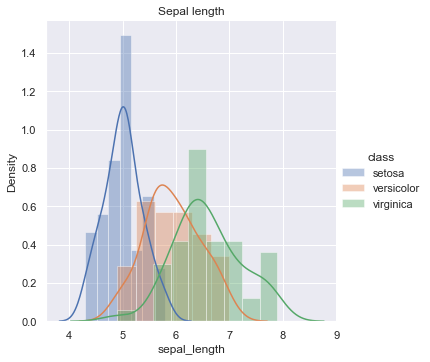

In [290]:
# This Histogram will show the Sepal Length for all three species and display them on the same figure. This will give a better
# view to the correlation of each species sepal length.
# Using seaborn to create the histogram, defining the data input and the figure height

sns.FacetGrid(ids, hue="class", height=5)\
   .map(sns.distplot, "sepal_length")\
   .add_legend() # Adding a legend to easily distinguish each species
plt.title("Sepal length") # Creating a title for the histogram


c:\Users\Jamie\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Jamie\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Jamie\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

Text(0.5, 1.0, 'Sepal Width')

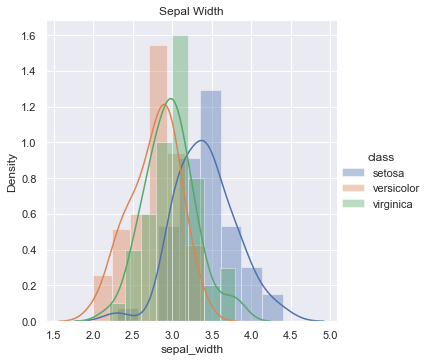

In [291]:
# Overlapping histogram showing the Sepal Width of all three Species

sns.FacetGrid(ids, hue="class", height=5)\
   .map(sns.distplot, "sepal_width")\
   .add_legend();
plt.title("Sepal Width")


c:\Users\Jamie\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Jamie\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Jamie\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

Text(0.5, 1.0, 'Petal Length')

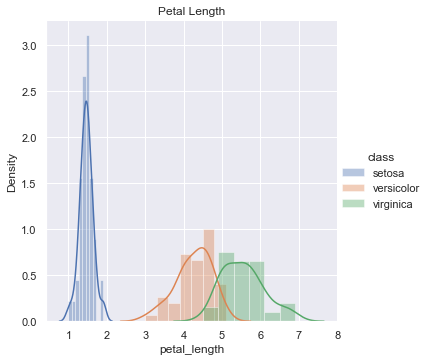

In [292]:
# Overlapping histogram showing the Petal Length of all three Species

sns.FacetGrid(ids, hue="class", height=5)\
   .map(sns.distplot, "petal_length")\
   .add_legend();
plt.title("Petal Length")


c:\Users\Jamie\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Jamie\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Jamie\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

Text(0.5, 1.0, 'Petal Width')

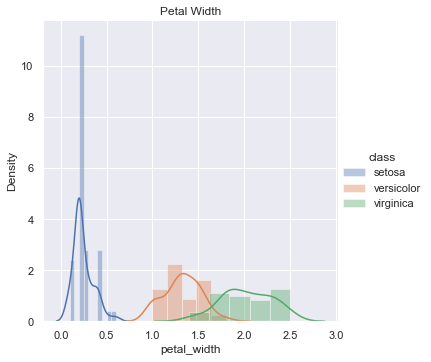

In [293]:
# Overlapping histogram showing the Petal Width of all three Species

sns.FacetGrid(ids, hue="class", height=5)\
   .map(sns.distplot, "petal_width")\
   .add_legend();
plt.title("Petal Width")


<br/>

**Scatterpot Matrix**

<function seaborn.axisgrid.pairplot(data, *, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, corner=False, dropna=False, plot_kws=None, diag_kws=None, grid_kws=None, size=None)>

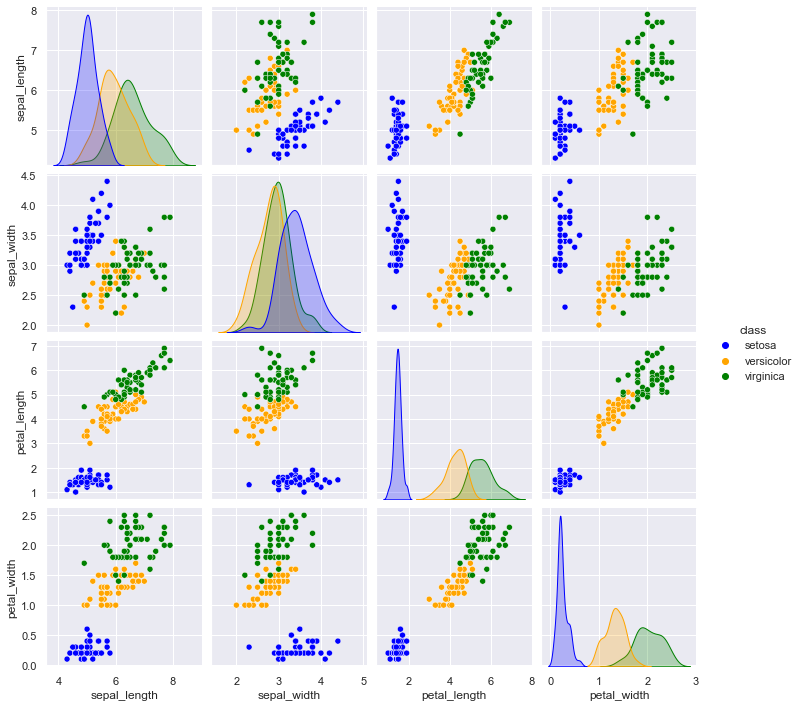

In [294]:
# A scatterplot matrix is a grid of scatterplots where each scatterplot in the grid is created between different combinations
# of Variables. 

# A Scatterplot matrix is a great tool for assessing the pairwise relationship between two or more variables.

# Using seaborn module to create scatterplot matrix (also known as a pairplot) 
sns.pairplot(ids, markers=["o","o","o"], hue ='class', palette=["blue","orange","green"])

# Print
sns.pairplot


<br/>

**Results**
<br/>

From calculating the mean and median of each of the Iris measurements for all three species of iris, and using visual aids like scatterplots and overlapping histograms, I can conclude that the Setosa Iris species has the smaller petal length and width, the smaller sepal length but the larger sepal width. This means that the Setosa is the smaller of the three species, and possibly the most distinguishable of the three. If trying to distingush the species from one another, it might be easier to measure the petals first. If the petal length is less than 2cm and the width is less than 0.6cm then according to the Iris Data set, it will be the Setosa species. The Sepal of the Setosa should also be more of a boxy shape, with the length and width being on average closer in size.
<br/>

It may be harder to tell the Virginica and versicolor species apart, and they are often misclassified as eachother. If the Iris petal length is between 3cm and 5cm, and the petal width is between 1cm and 1.8cm then it may be classified as a Versicolor Iris. It may be hard to tell a Versicolor from a Virginica by measuring the Sepal length or width as the data from the two species over lap alot more when it comes to their Sepal sizes.

<br/>

***

<br/>

**<h3 style="text-align: center;">Task 5</h3>**

<br/>

> Perform Principal Component Analysis on the iris data set, reducing the number of dimensions to two. Explain the purpose of the analysis and your results. 

<br/>

**Principle Component Analysis**

Principal component analysis (PCA) is a linear dimensionality reduction technique with applications in data analysis, visualization and data preprocessing. This is accomplished by linearly transforming the data onto a new coordinate system (principal components) such that the directions capturing the largest variation in the data can be easily identified. Many studies use the first two principal components in order to plot the data in two dimensions and to visually identify clusters of closely related data points.

<br/>

How does Principle Component Analysis work -

* Calculates the covariance matrix X of data points.
* Calculates eigen vectors and corresponding eigen values.
* Sorts the eigen vectors according to their eigen values in decreasing order.
* Choose first k eigen vectors and that will be the new k dimensions.
* Transforms the original n dimensional data points into k dimensions.



In [295]:
# Import modules

from sklearn.decomposition import PCA

In [296]:
# Scaling each data point 

pca = PCA()
X_new = pca.fit_transform(X)

In [297]:
pca.get_covariance()

array([[ 0.68569351, -0.03926846,  1.27368233,  0.5169038 ],
       [-0.03926846,  0.18800403, -0.32171275, -0.11798121],
       [ 1.27368233, -0.32171275,  3.11317942,  1.29638747],
       [ 0.5169038 , -0.11798121,  1.29638747,  0.58241432]])

In [298]:
# The explained variance tells us how much information (variance) can be attributed to each of the principal components.
# Percentage of variance explained for each components

explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.92461621, 0.05301557, 0.01718514, 0.00518309])

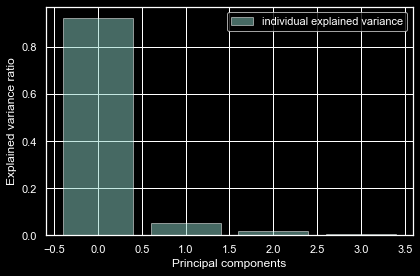

In [305]:
# Variance Ratio in histogram

with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(4), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend()
    plt.tight_layout()

In [300]:
# Apply PCA - sets up the default PCA solver to compute firs two principal components

pca=PCA(n_components=2)
X_new=pca.fit_transform(X)

In [301]:
# Separate features and target variable

features = ids.drop('class', axis=1)
target = ids['class']

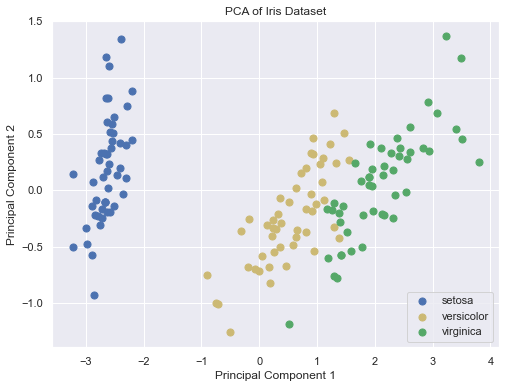

In [302]:
# Scatterplot of results

plt.figure(figsize=(8, 6))
species = target.unique()
colors = ['b', 'y', 'g']
for species, color in zip(species, colors):
    indices_to_keep = final_ids['class'] == species
    plt.scatter(final_ids.loc[indices_to_keep, 'Principal Component 1'],
                final_ids.loc[indices_to_keep, 'Principal Component 2'],
                c=color, s=50, label=species)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('PCA of Iris Dataset')
plt.show()

<br/>

**Results**
<br/>

Now the Iris data has been reduced by 50%, we can look at the Iris dataset again, now with only two features. We still have two principle components which contain the majority of the statistical variance in the original data, and clustering or classification would still be an easy task.
<br/>
From the above scatterplot we can see that Setosa is clearly well seperated from the versicolor and virginica species, which are closer together and have a very slight overlap 

<br/>

***

<br/>

<h3 style="text-align: center;">References</h3>

**Task 1**

1. https://atlantictu-my.sharepoint.com/:v:/r/personal/ian_mcloughlin_atu_ie/Documents/student_shares/machine_learnning_and_statistics/1_general/t01v11_task_one_and_repo.mkv?csf=1&web=1&e=kuIJoM&nav=eyJyZWZlcnJhbEluZm8iOnsicmVmZXJyYWxBcHAiOiJTdHJlYW1XZWJBcHAiLCJyZWZlcnJhbFZpZXciOiJTaGFyZURpYWxvZyIsInJlZmVycmFsQXBwUGxhdGZvcm0iOiJXZWIiLCJyZWZlcnJhbE1vZGUiOiJ2aWV3In19

2. https://go.dev/tour/flowcontrol/8

3. https://math.mit.edu/~stevenj/18.335/newton-sqrt.pdf


<br/>

**Task 2**

1. https://en.wikipedia.org/wiki/Chi-squared_test

2. https://www.jmp.com/en_be/statistics-knowledge-portal/chi-square-test.html

3. https://www.bmj.com/about-bmj/resources-readers/publications/statistics-square-one/8-chi-squared-tests

4. https://statistics.laerd.com/spss-tutorials/chi-square-test-for-association-using-spss-statistics.php

5. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html

6. https://medium.com/swlh/how-to-run-chi-square-test-in-python-4e9f5d10249d

7. https://statisticseasily.com/when-p-value-is-less-than-005/#:~:text=When%20p%20value%20is%20less%20than%200.05%2C%20it%20indicates%20that,between%20the%20variables%20being%20studied


<br/>

**Task 3**

1. https://www.researchgate.net/publication/361755492_Data_Analysis_Using_Statistical_Methods_Case_Study_of_Categorizing_the_Species_of_Penguin

2. https://www.scribbr.com/statistics/t-test/#:~:text=A%20t%20test%20is%20a,are%20different%20from%20one%20another.

3. https://www.kaggle.com/code/parulpandey/penguin-dataset-the-new-iris

4. https://allisonhorst.github.io/palmerpenguins/articles/intro.html

5. https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0090081


<br/>

**Task 4**

1. https://en.wikipedia.org/wiki/Iris_flower_data_set

2. https://github.com/JTohall/Pands_Project/blob/main/Analysis.py

3. https://www.kaggle.com/code/junyingzhang2018/classification-on-iris-data


<br/>

**Task 5**

1. https://www.kaggle.com/code/shrutimechlearn/step-by-step-pca-with-iris-dataset

2. https://medium.com/swlh/an-intuitive-approach-to-pca-fc4d05c14c19

3. https://en.wikipedia.org/wiki/Principal_component_analysis

4. https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html

5. https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

6. https://python.hotexamples.com/examples/sklearn.decomposition/PCA/get_covariance/python-pca-get_covariance-method-examples.html

7. https://blog.turingcollege.com/fundamentals-of-pca-for-data-modeling/